In [14]:
# ===========================
# Gold Price Forecasting using Linear Regression
# ===========================

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------
# Step 1: Load Dataset
# ---------------------------

# Change the file path if needed
df = pd.read_csv("gold_price_forecasting_dataset.csv")

# Display first few rows
df.head()


,date,adj close,close,high,low,open,volume,ma_7,ma_30,ma_90,daily_return,volatility_7,volatility_30,rsi,macd,macd_signal,bb_upper,bb_lower
0,2021-06-11,1877.400024,1877.400024,1902.300049,1875.199951,1900.900024,349,1887.828561,1860.180005,1790.618891,-0.008869,0.009353,0.007538,54.722931,19.724030,24.933953,1918.242879,1853.797124
1,2021-06-14,1864.000000,1864.000000,1866.599976,1846.500000,1866.199951,41,1886.799997,1863.403337,1790.972225,-0.007138,0.006411,0.007711,49.391919,16.433420,23.233846,1913.119794,1861.530206
2,2021-06-15,1854.500000,1854.500000,1867.199951,1854.400024,1866.400024,78,1881.757132,1865.506669,1791.701114,-0.005097,0.004572,0.007474,45.972581,12.910196,21.169116,1914.969370,1858.380630
3,2021-06-16,1859.500000,1859.500000,1860.099976,1809.199951,1859.400024,117,1876.428554,1868.296667,1792.241113,0.002696,0.004348,0.007240,48.012515,10.401571,19.015607,1915.862799,1856.657196
4,2021-06-17,1773.800049,1773.800049,1823.300049,1769.599976,1811.800049,1135,1859.514282,1867.953337,1791.595558,-0.046088,0.016895,0.011288,28.293542,1.481124,15.508710,1938.202457,1823.567538


In [2]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by date (important for time series)
df = df.sort_values(by='date')

# Drop date column for regression model
df_model = df.drop(columns=['date'])

# Check for missing values
print(df_model.isnull().sum())

# Fill missing values (if any) with forward fill
df_model = df_model.ffill()




adj close        0
close            0
high             0
low              0
open             0
volume           0
ma_7             0
ma_30            0
ma_90            0
daily_return     0
volatility_7     0
volatility_30    0
rsi              0
macd             0
macd_signal      0
bb_upper         0
bb_lower         0
dtype: int64


In [3]:
# Define features (X) and target (y)
X = df_model.drop(columns=['close'])
y = df_model['close']


In [4]:
# Split into training and testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
# Initialize model
lr = LinearRegression()

# Train model
lr.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [6]:
# Initialize model
lr = LinearRegression()

# Train model
lr.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
# Predict on test data
y_pred = lr.predict(X_test)


In [8]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 4.343581955874072e-25
R-squared Score: 1.0


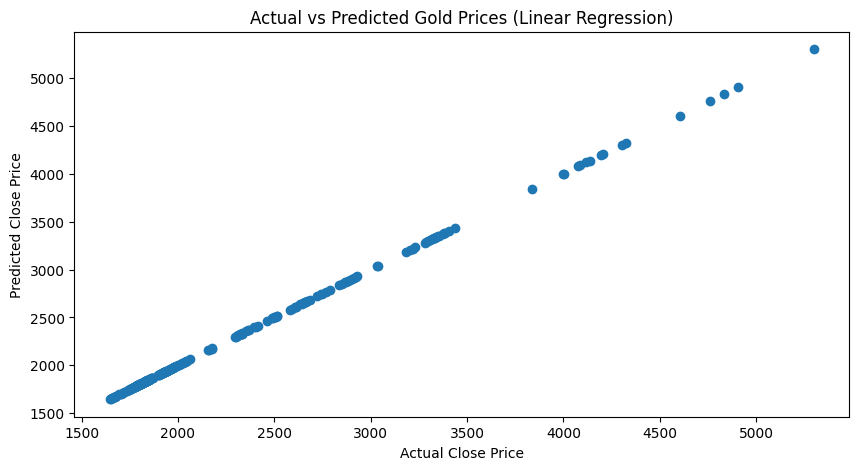

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Gold Prices (Linear Regression)")
plt.show()


In [10]:
# Create dataframe of coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)


          Feature   Coefficient
0       adj close  1.000000e+00
9    volatility_7  9.986979e-13
12           macd  3.485309e-15
14       bb_upper  1.144555e-15
11            rsi  1.130779e-15
15       bb_lower  3.451002e-16
1            high  2.466358e-16
5            ma_7  1.015298e-16
4          volume -1.123004e-17
7           ma_90 -2.267656e-17
6           ma_30 -1.282080e-16
2             low -3.006576e-16
3            open -3.516350e-16
13    macd_signal -4.059920e-15
8    daily_return -2.394188e-13
10  volatility_30 -4.673631e-13


In [11]:
import pickle

# Save the trained model as a .pkl file
with open("gold_price_linear_model.pkl", "wb") as file:
    pickle.dump(lr, file)

print("Model saved successfully as gold_price_linear_model.pkl")


Model saved successfully as gold_price_linear_model.pkl


In [12]:
import pickle

with open("gold_price_linear_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Example prediction
sample_pred = loaded_model.predict(X_test[:5])
print(sample_pred)


[2157.30004883 4087.60009766 1808.69995117 1776.         3340.10009766]


In [13]:
import pickle

with open("gold_price_linear_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!
